# Test Resnet152

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
from keras import layers, models, losses, optimizers, metrics
from random import shuffle
import sys

sys.path.append('../../')

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [9]:
# Construire le dataset à partir des dossiers dans data/base

image_size = (128, 128)
batch_size = 64
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "../data/base",
    validation_split=0.2,
    subset="both",
    seed=1,
    image_size=image_size,
    batch_size=batch_size,
    color_mode="rgb"
)

Found 2093 files belonging to 13 classes.
Using 1675 files for training.
Using 418 files for validation.


In [10]:
print(val_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
preprocessing_layer = tf.keras.Sequential([
    layers.Resizing(128, 128),
    layers.Rescaling(1./255),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

base_model = tf.keras.applications.resnet.ResNet152(input_shape=(128, 128, 3),
                                               include_top=False,
                                               weights='imagenet', pooling='avg')
base_model.trainable = False

model = tf.keras.Sequential([
    preprocessing_layer,
    base_model,
    layers.Flatten(),
    layers.Dense(13, activation='softmax')
])

In [12]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.CategoricalAccuracy()]
)

In [13]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=40,
    batch_size=batch_size,
)

Epoch 1/40


I0000 00:00:1750796518.657995  119490 cuda_dnn.cc:529] Loaded cuDNN version 90300


27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - categorical_accuracy: 0.0581 - loss: 3.3931 - val_categorical_accuracy: 0.0789 - val_loss: 3.1986
Epoch 2/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - categorical_accuracy: 0.0629 - loss: 2.9857 - val_categorical_accuracy: 0.0670 - val_loss: 3.1015
Epoch 3/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - categorical_accuracy: 0.0658 - loss: 2.8284 - val_categorical_accuracy: 0.0694 - val_loss: 3.0109
Epoch 4/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - categorical_accuracy: 0.0456 - loss: 2.7427 - val_categorical_accuracy: 0.0694 - val_loss: 2.9552
Epoch 5/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - categorical_accuracy: 0.0350 - loss: 2.6281 - val_categorical_accuracy: 0.0622 - val_loss: 2.9129
Epoch 6/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - categorical_accuracy: 0.0600 - loss: 2.5501 - val_categorical_accuracy: 0.0574 - val_loss: 2.8705
Epoch 7/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - categorical_accuracy: 0.0527 - loss: 2.5024 - val_

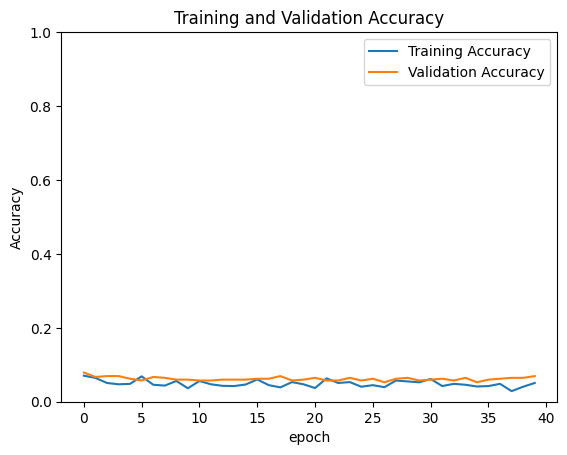

Text(0.5, 0, 'epoch')

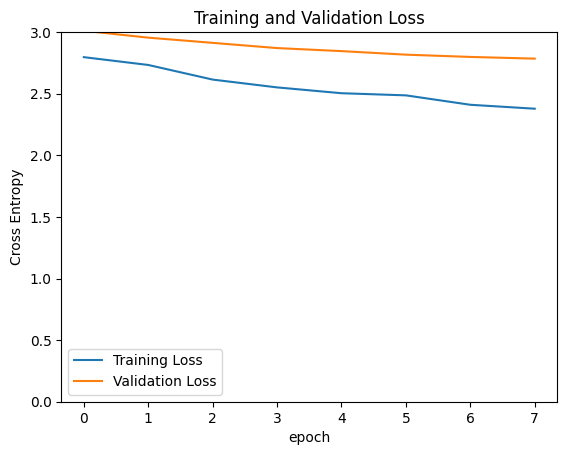

In [14]:
plt.plot(history.history["categorical_accuracy"], label='Training Accuracy')
plt.plot(history.history["val_categorical_accuracy"], label='Validation Accuracy')
plt.legend(loc='best')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history["loss"][2:10], label='Training Loss')
plt.plot(history.history["val_loss"][2:10], label='Validation Loss')
plt.legend(loc='best')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

In [15]:
castor = tf.io.read_file("/home/shared/Mammiferes_jpg/Castor/original.jpeg")
castor = tf.image.decode_jpeg(castor, channels=3)
resized_castor = tf.image.resize(castor, [256,256], method="bilinear")

input = tf.expand_dims(
    resized_castor,
    axis = 0
)

footprint_model.predict(input)

2025-06-24 22:22:33.898791: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /home/shared/Mammiferes_jpg/Castor/original.jpeg; No such file or directory
2025-06-24 22:22:33.898807: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: NOT_FOUND: /home/shared/Mammiferes_jpg/Castor/original.jpeg; No such file or directory


NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} /home/shared/Mammiferes_jpg/Castor/original.jpeg; No such file or directory [Op:ReadFile]